<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Format" data-toc-modified-id="Format-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Format</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Std-curve" data-toc-modified-id="Std-curve-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Std curve</a></span></li><li><span><a href="#Unknowns" data-toc-modified-id="Unknowns-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Unknowns</a></span><ul class="toc-item"><li><span><a href="#Writing-table" data-toc-modified-id="Writing-table-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Writing table</a></span></li><li><span><a href="#effect-of-input-DNA-amount" data-toc-modified-id="effect-of-input-DNA-amount-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>effect of input DNA amount</a></span></li></ul></li></ul></li><li><span><a href="#Compare-to-16S-arch" data-toc-modified-id="Compare-to-16S-arch-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare to 16S-arch</a></span><ul class="toc-item"><li><span><a href="#All-Meth.-clades" data-toc-modified-id="All-Meth.-clades-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>All Meth. clades</a></span><ul class="toc-item"><li><span><a href="#Stats" data-toc-modified-id="Stats-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Stats</a></span></li></ul></li><li><span><a href="#Just-Methanothermobacter" data-toc-modified-id="Just-Methanothermobacter-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Just Methanothermobacter</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Process qPCR experimental data
* primers: 174FR (Methanothermobacter-specific)

# Var

In [46]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/qPCR/174FR/2021-05-11/'
qPCR_res1_file = file.path(work_dir, '../2021-03-31', 'admin_2021-03-31_Connect3_results.xlsx')
qPCR_res2_file = file.path(work_dir, '../2021-04-13', 'admin_2021-04-13_Connect3_results.xlsx')
qPCR_res3_file = file.path(work_dir, '../2021-04-16', 'admin_2021-04-16_Connect3_results.xlsx')
qPCR_res4_file = file.path(work_dir, 'admin_2021-05-11_Connect3_Results.xlsx')

# 16S-archaea data
## 16S-arch phyloseq object (one sample per species)
physeq_arch_SpecD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_SpecD.RDS'
## 16S-arch phyloseq object (one sample per individual)
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD.RDS'

# host tree
host_tree_SpecD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20190416_rn.nwk'
host_tree_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_200429_16S-arch_IndD.nwk'

# all sample metadata
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_200429.tsv'

# params
threads = 4

# Init

In [47]:
library(dplyr)
library(tidyr)
library(readxl)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [48]:
make_dir(work_dir)
setDTthreads(threads)
df.dims()

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/qPCR/174FR/2021-05-11/ 


# Load

In [50]:
# qPCR results
L = list(
    readxl::read_excel(qPCR_res1_file) %>% mutate(experiment = '2021-03-31'),
    readxl::read_excel(qPCR_res2_file) %>% mutate(experiment = '2021-04-13'),
    readxl::read_excel(qPCR_res3_file) %>% mutate(experiment = '2021-04-16'),
    readxl::read_excel(qPCR_res4_file) %>% mutate(experiment = '2021-05-11')
)
qPCR = rbindlist(L, use.names=TRUE, fill=TRUE)
qPCR

Well,Fluor,Target,Content,Sample,Replicate,Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),⋯,copies per reaction,DNA conc. ng/ul (undiluted sample),sample mass (g),DNAx volume (ul),ng DNA per g,copies per g,experiment,DNA conc. ng/ul (diluted - used for qPCR),Biological Set Name,Well Note
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>
A01,SYBR,Methanothermobacter,Std-1,M. marburgensis,1,16.01136,15.78941,0.195816,5310000,⋯,NA,28.2,NA,100,NA,NA,2021-03-31,NA,NA,NA
A02,SYBR,Methanothermobacter,Std-1,M. marburgensis,2,15.64105,15.78941,0.195816,5310000,⋯,NA,28.2,NA,100,NA,NA,2021-03-31,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
H11,SYBR,Methanothermobacter,Pos Ctrl-01,M. thermautotr,2,19.22140,18.85783,0.3948031,283709.9,⋯,293493.0,2.9,NA,100,NA,NA,2021-05-11,0.97,NA,NA
H12,SYBR,Methanothermobacter,Pos Ctrl-01,M. thermautotr,3,18.43786,18.85783,0.3948031,442080.4,⋯,457324.6,2.9,NA,100,NA,NA,2021-05-11,0.97,NA,NA


In [51]:
# archaea
physeq_arch_IndD = readRDS(physeq_arch_IndD_file)
physeq_arch_IndD

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1891 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 1891 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1891 tips and 1888 internal nodes ]

In [52]:
# archaeae sample metadata
meta_arch = physeq_arch_IndD %>%
    phyloseq2df(sample_data) %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name) %>%
    mutate(scientific_name = gsub('_', ' ', scientific_name),
           SampleID = gsub('^F', 'XF', SampleID))
meta_arch

SampleID,class,order,family,genus,scientific_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
XF14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis brama
XF35_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus elaphus
⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,Mammalia,Perissodactyla,Equidae,Equus,Equus quagga
X67_European_Roe,Mammalia,Artiodactyla,Cervidae,Capreolus,Capreolus capreolus


In [53]:
# all sample metadata
meta = read.delim(metadata_file, sep='\t') %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name) %>%
    mutate(scientific_name = gsub('_', ' ', scientific_name),
           SampleID = gsub('^F', 'XF', SampleID))
overlap(meta_arch$SampleID, meta$SampleID, diff='x')
meta

character(0)

SampleID,class,order,family,genus,scientific_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
XF14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis brama
XF35_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus elaphus
⋮,⋮,⋮,⋮,⋮,⋮
X189_fail_Rainbow_Trout,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,Oncorhynchus mykiss
X232_fail_Brown_Trout,Actinopterygii,Salmoniformes,Salmonidae,Salmo,Salmo trutta


## Format

In [54]:
overlap(qPCR$Sample, meta$SampleID)
overlap(qPCR$Sample, meta$SampleID, diff='x')

intersect(x,y): 46 
setdiff(x,y): 8 
setdiff(y,x): 429 
union(x,y): 483 


[1] "M. marburgensis" "water"           "R. hominis"      "M. thermautotr" 
[5] "M- marburgensis" "Water"           "M. thermautotro" NA

In [55]:
# adding metadata
qPCR = qPCR %>%
    left_join(meta, c('Sample'='SampleID'))
qPCR

Well,Fluor,Target,Content,Sample,Replicate,Cq,Cq Mean,Cq Std. Dev,Starting Quantity (SQ),⋯,copies per g,experiment,DNA conc. ng/ul (diluted - used for qPCR),Biological Set Name,Well Note,class,order,family,genus,scientific_name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
A01,SYBR,Methanothermobacter,Std-1,M. marburgensis,1,16.01136,15.78941,0.195816,5310000,⋯,NA,2021-03-31,NA,NA,NA,NA,NA,NA,NA,NA
A02,SYBR,Methanothermobacter,Std-1,M. marburgensis,2,15.64105,15.78941,0.195816,5310000,⋯,NA,2021-03-31,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
H11,SYBR,Methanothermobacter,Pos Ctrl-01,M. thermautotr,2,19.22140,18.85783,0.3948031,283709.9,⋯,NA,2021-05-11,0.97,NA,NA,NA,NA,NA,NA,NA
H12,SYBR,Methanothermobacter,Pos Ctrl-01,M. thermautotr,3,18.43786,18.85783,0.3948031,442080.4,⋯,NA,2021-05-11,0.97,NA,NA,NA,NA,NA,NA,NA


# Summary

## Std curve

* standard curves for all qPCR assays

In [56]:
# std curve
qPCR %>%
    filter(grepl('Std-', Content),
           experiment == '2021-04-16') %>%
    rename('copies_per_ul' = `Copies/ul`) %>%
    lm(log10(copies_per_ul) ~ Cq, data=.) %>% summary


Call:
lm(formula = log10(copies_per_ul) ~ Cq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24526 -0.03632  0.01203  0.07895  0.14380 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.540124   0.101980  103.35   <2e-16 ***
Cq          -0.246888   0.003849  -64.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1127 on 16 degrees of freedom
Multiple R-squared:  0.9961,	Adjusted R-squared:  0.9959 
F-statistic:  4114 on 1 and 16 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



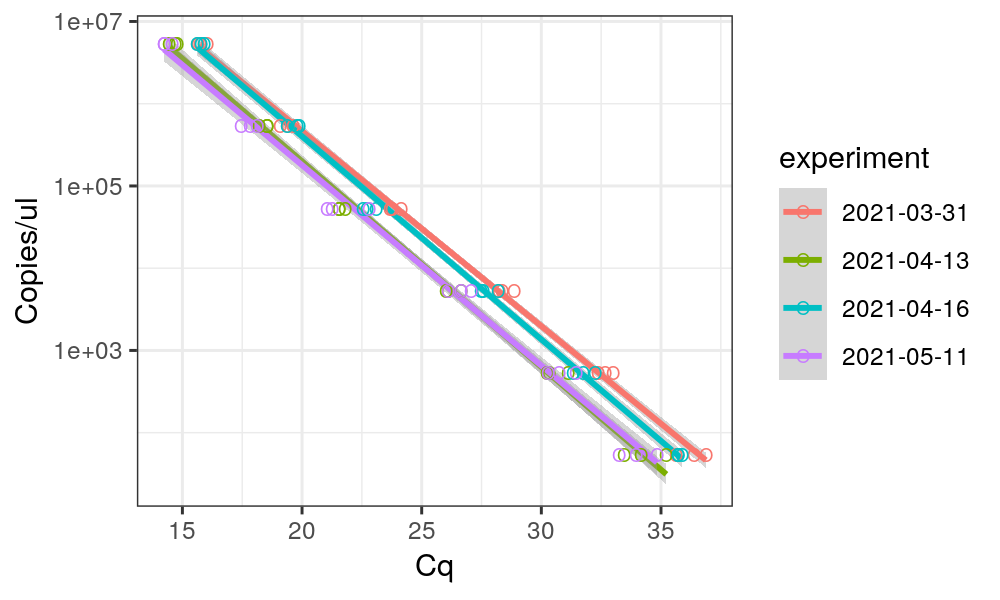

In [57]:
# std curve
p = qPCR %>%
    filter(grepl('Std-', Content)) %>%
    ggplot(aes(Cq, `Copies/ul`, color=experiment)) +
    geom_smooth(method='lm') +
    geom_point(shape='O', size=2) +
    scale_y_log10() +
    theme_bw()
p.dims(5,3)
plot(p)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 109 rows containing non-finite values (stat_smooth).”


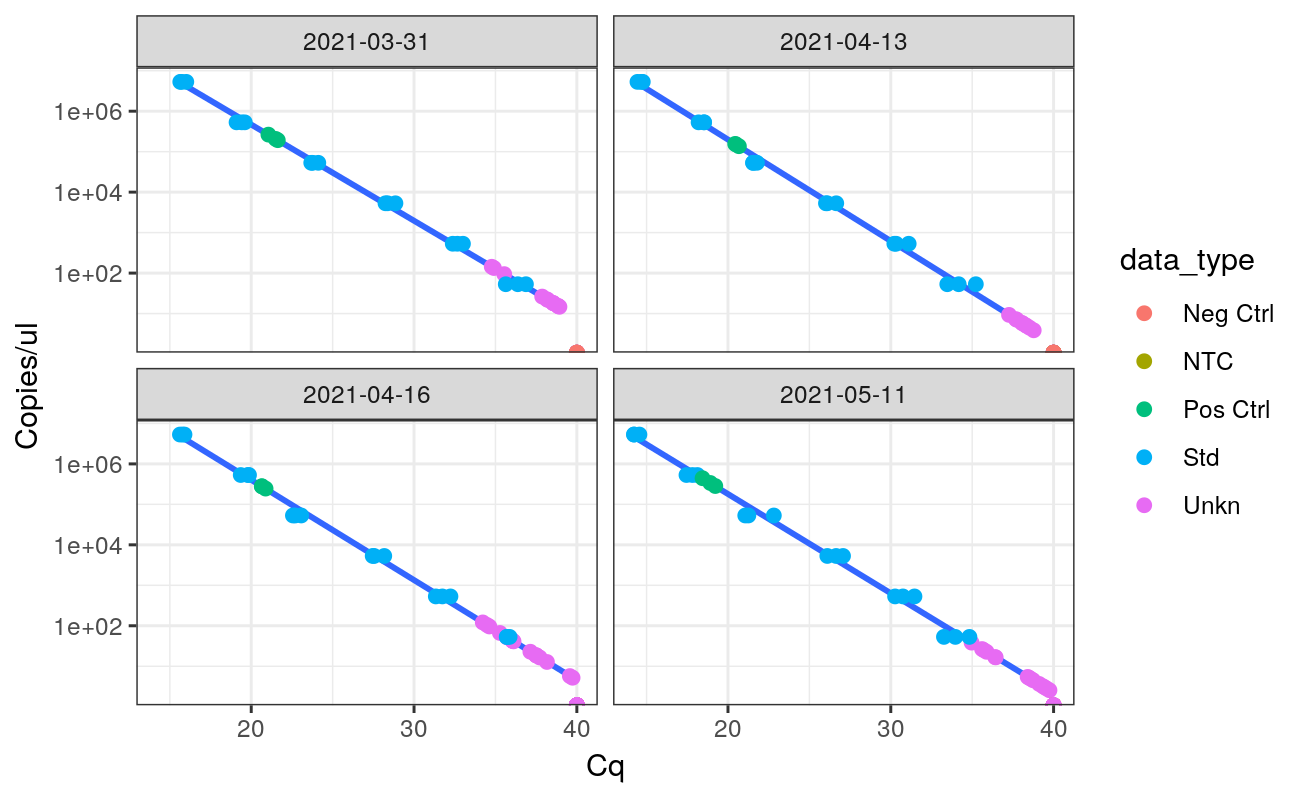

In [58]:
# std curve
p = qPCR %>%
    mutate(data_type = gsub('-.+', '', Content)) %>%
    mutate(Cq = ifelse(is.na(Cq), 40, Cq),
           `Copies/ul` = ifelse(is.na(`Copies/ul`), 0, `Copies/ul`)) %>%
    ggplot(aes(Cq, `Copies/ul`)) +
    geom_smooth(method='lm') +
    geom_point(aes(color=data_type), size=2) +
    scale_y_log10() +
    facet_wrap(~ experiment) +
    theme_bw()
p.dims(6.5,4)
plot(p)

## Unknowns

Warning message:
“Removed 109 rows containing non-finite values (stat_boxplot).”


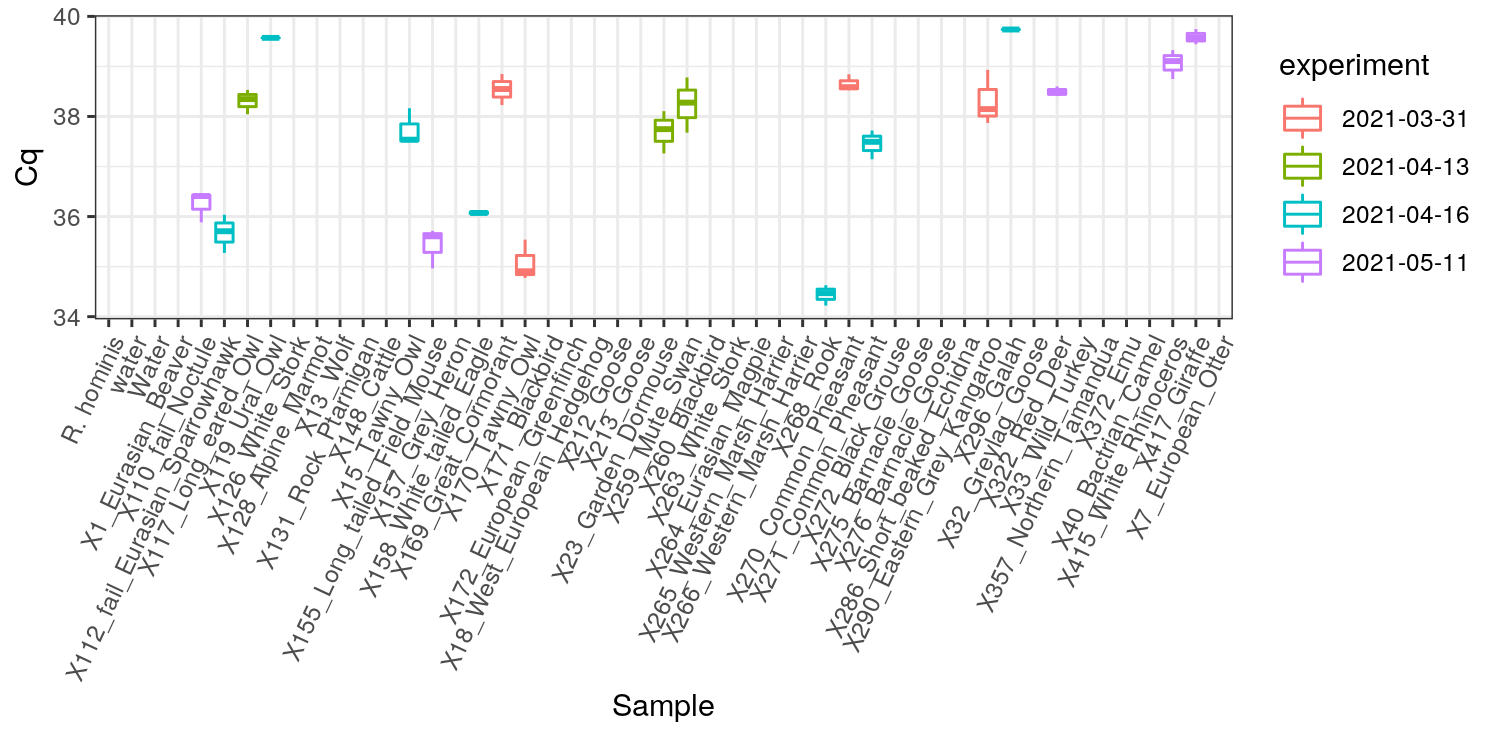

In [59]:
# just Cq
p = qPCR %>%
    filter(grepl('(Unkn|NTC|Neg Ctrl)-', Content)) %>%
    ggplot(aes(Sample, Cq, color=experiment)) +
    geom_boxplot() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
p.dims(7.5,3.7)
plot(p)

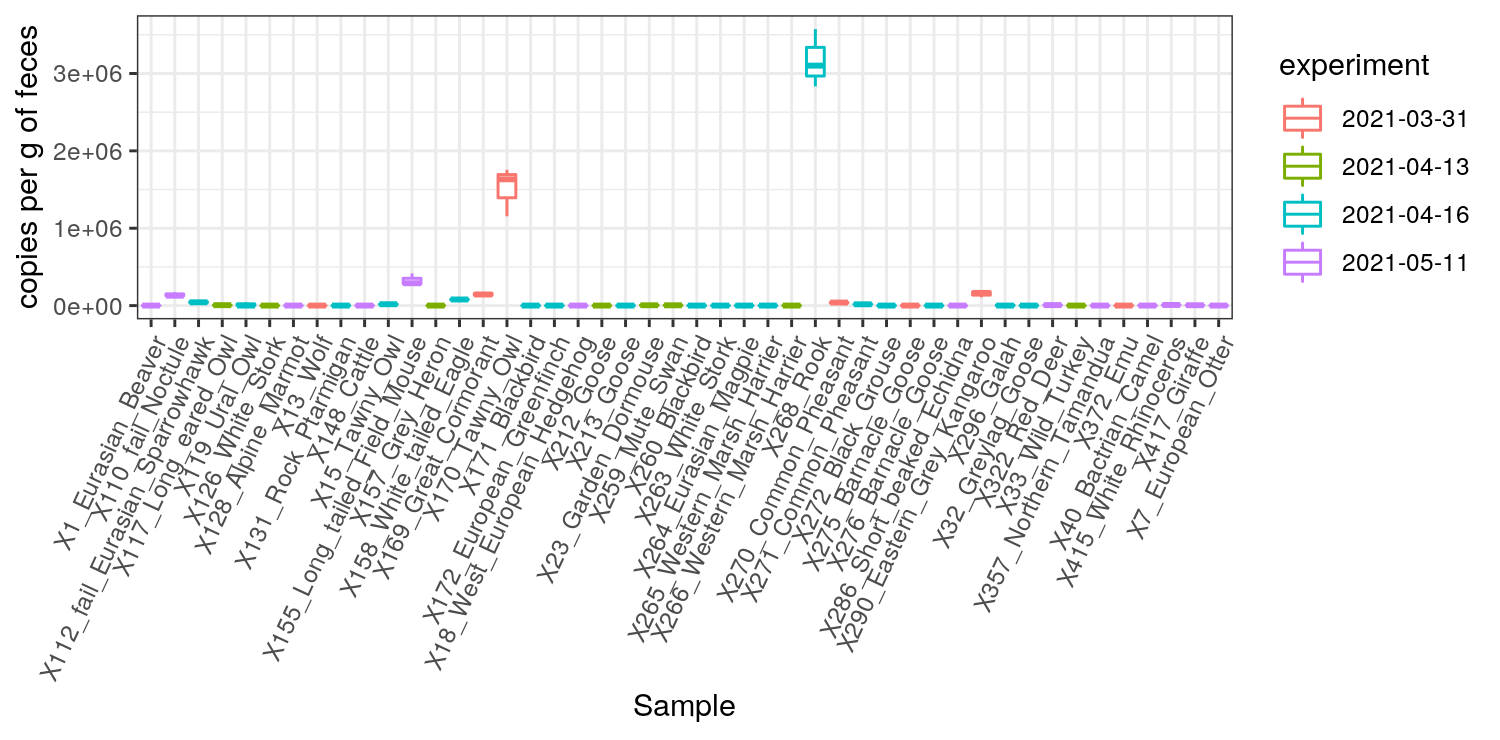

In [60]:
# plotting copies per g of feces
p = qPCR %>%
    filter(!grepl('marburg', Sample)) %>%
    filter(!is.na(`copies per g`)) %>%
    ggplot(aes(Sample, `copies per g`, color=experiment)) +
    geom_boxplot() +
    theme_bw() +
    labs(y='copies per g of feces') +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
p.dims(7.5,3.7)
plot(p)

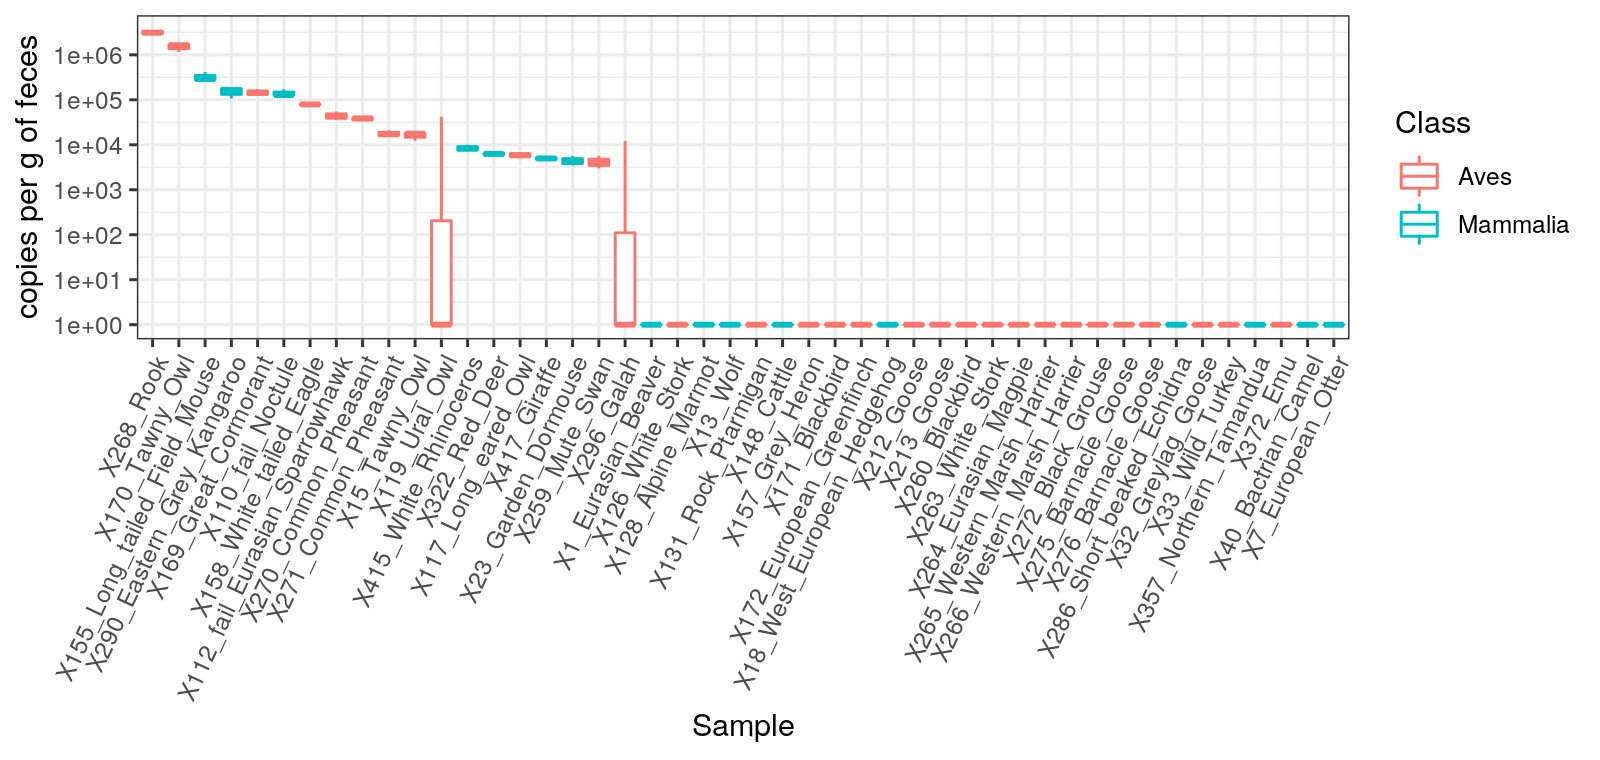

In [64]:
# plotting copies per g of feces
p = qPCR %>%
    filter(!grepl('marburg', Sample)) %>%
    filter(!is.na(`copies per g`)) %>%
    mutate(`copies per g` = ifelse(`copies per g` == 0, 1, `copies per g`)) %>%
    group_by(Sample) %>%
    mutate(mean_copies = mean(`copies per g`, na.rm=TRUE)) %>%
    ungroup() %>%
    mutate(Sample = Sample %>% reorder(-mean_copies)) %>%
    ggplot(aes(Sample, `copies per g`, color=class)) +
    geom_boxplot() +
    scale_y_log10(breaks=c(1,1e1,1e2,1e3,1e4,1e5,1e6,1e7)) +
    scale_color_discrete('Class') +
    theme_bw() +
    labs(y='copies per g of feces') +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
p.dims(8,3.8)
plot(p)

### Writing table

In [65]:
F = file.path(work_dir, 'qPCR_results.tsv')
qPCR %>% write_table(F)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/qPCR/174FR/2021-05-11//qPCR_results.tsv 


### effect of input DNA amount

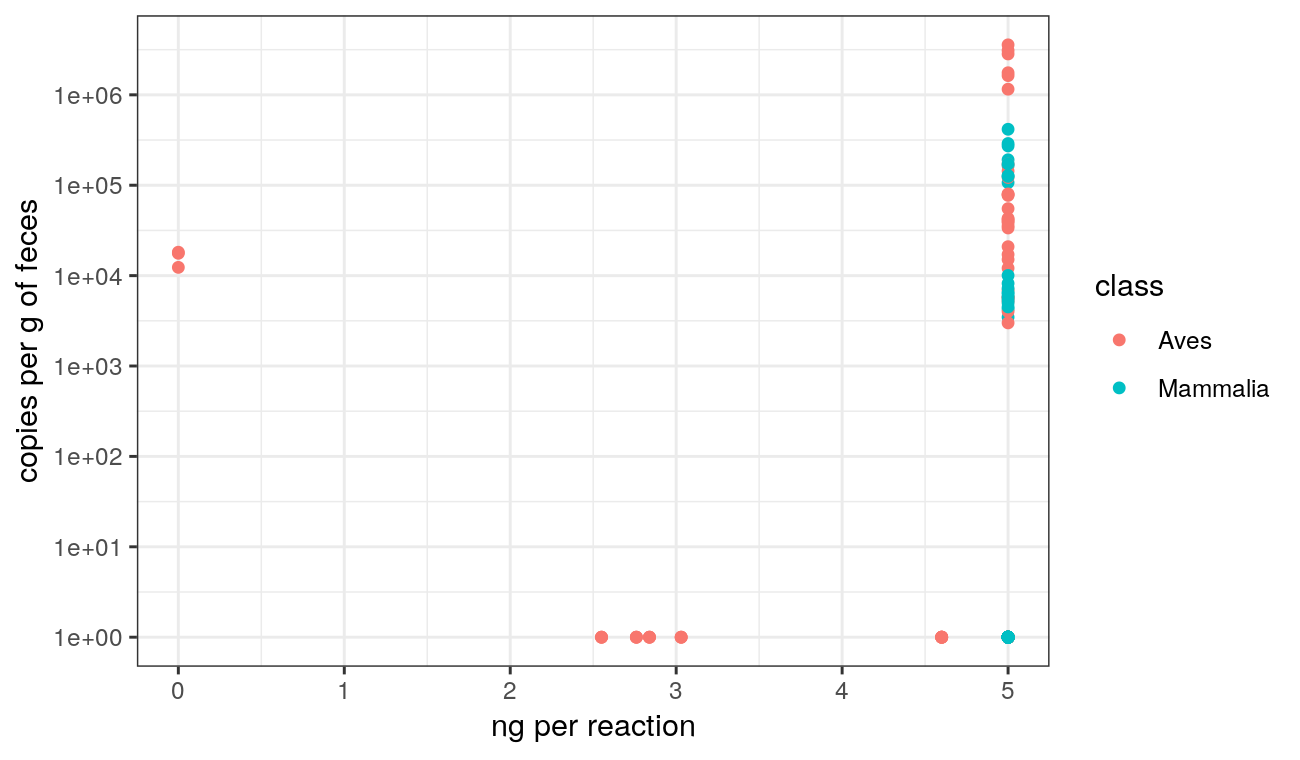

In [66]:
# plotting copies per ng of input DNA
p = qPCR %>%
    filter(!grepl('marburg', Sample)) %>%
    filter(!is.na(`copies per g`)) %>%
    mutate(`copies per g` = ifelse(`copies per g` == 0, 1, `copies per g`)) %>%
    ggplot(aes(`ng per reaction`, `copies per g`, color=class)) +
    geom_point() +
    scale_y_log10(breaks=c(1,1e1,1e2,1e3,1e4,1e5,1e6,1e7)) +
    theme_bw() +
    labs(y='copies per g of feces')
p.dims(6.5,3.8)
plot(p)

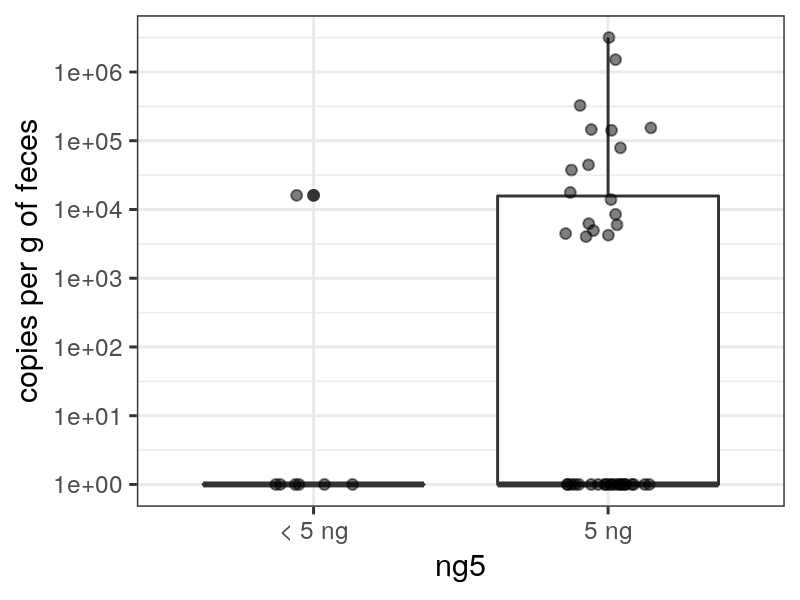

In [67]:
# plotting copies per ng of input DNA
p = qPCR %>%
    filter(!grepl('marburg', Sample)) %>%
    filter(!is.na(`copies per g`)) %>%
    mutate(`copies per g` = ifelse(`copies per g` == 0, 1, `copies per g`),
           ng5 = ifelse(`ng per reaction` < 5, '< 5 ng', '5 ng')) %>%
    group_by(Sample, ng5) %>%
    summarize(`copies per g` = mean(`copies per g`, na.rm=TRUE),
              .groups='drop') %>%
    ggplot(aes(ng5, `copies per g`)) +
    geom_boxplot() +
    geom_jitter(height=0, width=0.15, alpha=0.5) +
    scale_y_log10(breaks=c(1,1e1,1e2,1e3,1e4,1e5,1e6,1e7)) +
    theme_bw() +
    labs(y='copies per g of feces')
p.dims(4,3)
plot(p)

In [68]:
# stats: KW
qPCR_f = qPCR %>%
    filter(!grepl('marburg', Sample)) %>%
    filter(!is.na(`copies per g`)) %>%
    mutate(ng5 = ifelse(`ng per reaction` < 5, '< 5 ng', '5 ng')) %>%
    group_by(Sample, ng5) %>%
    summarize(`copies per g` = mean(`copies per g`, na.rm=TRUE),
              .groups='drop') 
kruskal.test(qPCR_f$`copies per g`, qPCR_f$ng5)


	Kruskal-Wallis rank sum test

data:  qPCR_f$`copies per g` and qPCR_f$ng5
Kruskal-Wallis chi-squared = 2.3209, df = 1, p-value = 0.1276


In [69]:
# stats: chi-sqr
qPCR_f = qPCR %>%
    filter.(!grepl('marburg', Sample)) %>%
    filter.(!is.na(`copies per g`)) %>%
    group_by(Sample, `ng per reaction`) %>%
    summarize(`copies per g` = mean(`copies per g`, na.rm=TRUE),
              .groups='drop')  %>%
    mutate.(qPCR_good = `copies per g` > 0,
            input_good = `ng per reaction` < 5) %>%
    summarize.(n = n.(), 
               .by=c(qPCR_good, input_good)) %>%
    pivot_wider.(names_from=qPCR_good, values_from=n) %>%
    as.data.frame
qPCR_f$input_good = NULL
qPCR_f

FALSE,TRUE
<int>,<int>
21,18
6,1


In [70]:
# stats: chi-sqr
chisq.test(qPCR_f %>% as.matrix)

Warning message in chisq.test(qPCR_f %>% as.matrix):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  qPCR_f %>% as.matrix
X-squared = 1.3454, df = 1, p-value = 0.2461


# sessionInfo

In [83]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq2/lib/libopenblasp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] phyloseq_1.34.0   LeyLabRMisc_0.1.9 tidytable_0.5.8   data.table_1.13.6
[5] ggplot2_3.3.3     readxl_1.3.1      tidyr_1.1.2       dplyr_1.0.3      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.6          ape_5.4-1           lattice_0.20-41    
 [4] prettyunits_1.1.1   